In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [114]:
df1 = pd.read_csv("used_cars_UK.csv")
df = df1.copy()
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


## Definition of data

In [115]:
# Looking information the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3685 non-null   object 
 1   Price              3685 non-null   int64  
 2   Mileage(miles)     3685 non-null   int64  
 3   Registration_Year  3685 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3685 non-null   object 
 6   Body type          3685 non-null   object 
 7   Engine             3640 non-null   object 
 8   Gearbox            3685 non-null   object 
 9   Doors              3660 non-null   float64
 10  Seats              3650 non-null   float64
 11  Emission Class     3598 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.4+ KB


In [116]:
# Data set have any null valuable
df.isnull().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64

In [117]:
# Our data set nunique value counts
df.nunique()

title                 469
Price                 866
Mileage(miles)       1570
Registration_Year      40
Previous Owners         9
Fuel type               6
Body type              10
Engine                 34
Gearbox                 2
Doors                   4
Seats                   6
Emission Class          6
Service history         1
dtype: int64

In [118]:
# Data set meaningful statistics
df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3685.000000,3.685000e+03,3685.000000,2276.000000,3660.000000,3650.000000
mean,5787.145726,8.132816e+04,2011.835007,2.807557,4.321038,4.900274
std,4480.810572,3.942083e+04,5.092566,1.546028,0.986902,0.577200
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.000000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


## Analysis and data modification operations

In [120]:
# First look Corr in our data set
df[["Price", "Mileage(miles)", "Doors", "Previous Owners", "Emission Class"]].corr()

,Price,Mileage(miles),Doors,Previous Owners
Price,1.000000,-0.500158,0.113352,-0.479424
Mileage(miles),-0.500158,1.000000,-0.037042,0.316160
Doors,0.113352,-0.037042,1.000000,-0.153262
Previous Owners,-0.479424,0.316160,-0.153262,1.000000


Does the Emission, Engine, Fuel type affect the correlation? To do this, we convert it from object type to a numerical variable.

In [121]:
emission_class_mapping = {
    "Euro 1": 1,
    "Euro 2": 2,
    "Euro 3": 3,
    "Euro 4": 4,
    "Euro 5": 5,
    "Euro 6": 6
}

df ["Emission Class"] = df["Emission Class"].map(emission_class_mapping)

In [122]:
fuel_type_mapping = {
    "Diesel": 0,
    "Petrol": 1
}

df["Fuel type"] = df["Fuel type"].map(fuel_type_mapping)

In [123]:
unique_engine_values = df["Engine"].unique()

label_encoder = LabelEncoder()

df["Engine"] = label_encoder.fit_transform(df["Engine"])

In [127]:
unique_engine_values = df["Body type"].unique()

label_encoder = LabelEncoder()

df["Body type"] = label_encoder.fit_transform(df["Body type"])

In [128]:
df[["Price", 
    "Mileage(miles)", 
    "Doors", 
    "Previous Owners", 
    "Emission Class", 
    "Fuel type", 
    "Engine",
    "Body type"]].corr()

,Price,Mileage(miles),Doors,Previous Owners,Emission Class,Fuel type,Engine,Body type
Price,1.000000,-0.500158,0.113352,-0.479424,0.697993,-0.098660,-0.024192,0.196216
Mileage(miles),-0.500158,1.000000,-0.037042,0.316160,-0.378280,-0.222251,0.271874,0.024488
Doors,0.113352,-0.037042,1.000000,-0.153262,0.181599,-0.171714,-0.020629,0.258778
Previous Owners,-0.479424,0.316160,-0.153262,1.000000,-0.476526,0.007612,0.181657,-0.071969
Emission Class,0.697993,-0.378280,0.181599,-0.476526,1.000000,-0.145279,-0.265995,0.041821
Fuel type,-0.098660,-0.222251,-0.171714,0.007612,-0.145279,1.000000,-0.394198,-0.216311
Engine,-0.024192,0.271874,-0.020629,0.181657,-0.265995,-0.394198,1.000000,0.250067
Body type,0.196216,0.024488,0.258778,-0.071969,0.041821,-0.216311,0.250067,1.000000


We saw from the table that there is a significant correlation value between the Price variable and the Mileage(miles), Previous Owners, Emission Class variables.

## Viewing Data Relationships

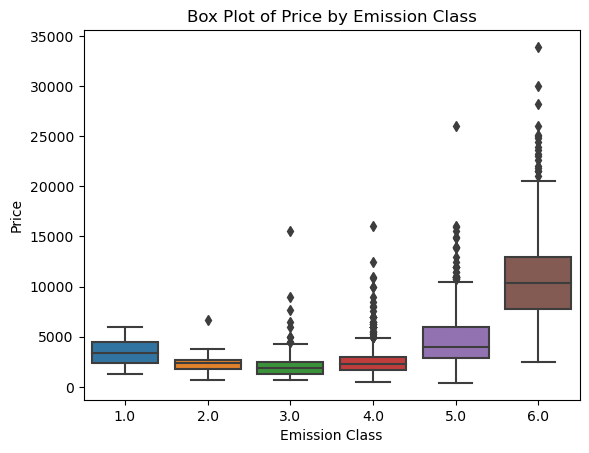

In [136]:
sns.boxplot(x='Emission Class', y='Price', data=df)
plt.xlabel('Emission Class')
plt.ylabel('Price')
plt.title('Box Plot of Price by Emission Class')
plt.show()

We can easily see when the Price increases as the Emission Class increases

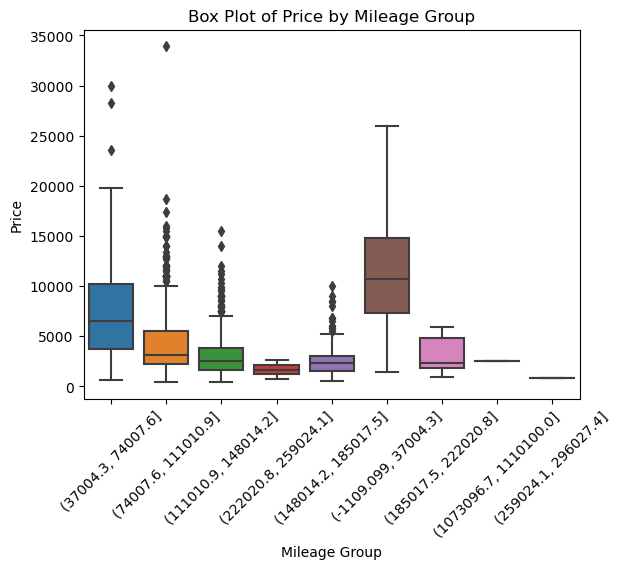

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert "Mileage(miles)" column to int type values
df["Mileage(miles)"] = df["Mileage(miles)"].astype(int)

# Group "Mileage(miles)" values in specific ranges
df["Mileage Group"] = pd.cut(df["Mileage(miles)"], bins=30).astype(str)

sns.boxplot(x="Mileage Group", y="Price", data=df)
plt.xlabel("Mileage Group")
plt.ylabel("Price")
plt.title("Box Plot of Price by Mileage Group")
plt.xticks(rotation=45)
plt.show()

I divided the Mileage(miles) variable into groups because we saw above with the ".nunique()" function that there are 1570 unique values in total. If I include all of them, our eyes will probably hurt :).

What you should understand from here is that if the number of miles is low, the price is high, but this is not the only factor. Because the brown box shows us this.

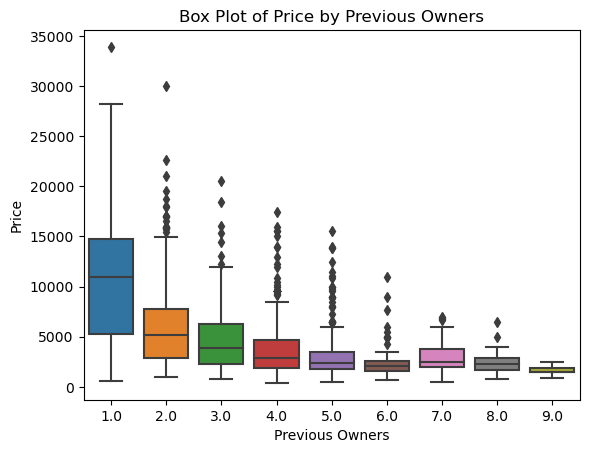

In [138]:
sns.boxplot(x="Previous Owners", y="Price", data=df)
plt.xlabel("Previous Owners")
plt.ylabel("Price")
plt.title("Box Plot of Price by Previous Owners")
plt.show()

Of course, as the number of previous owners increases, the price of the vehicle decreases.

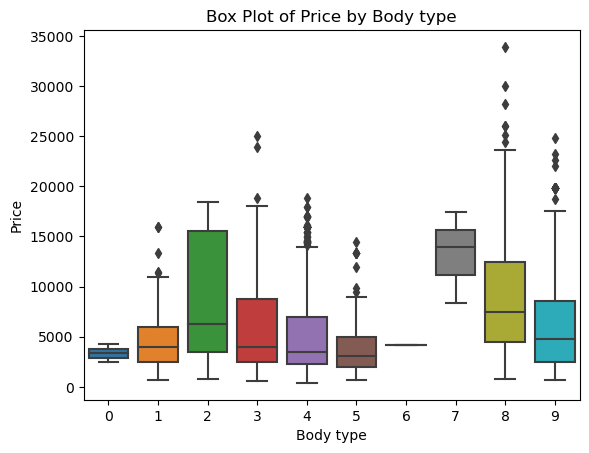

In [139]:
sns.boxplot(x='Body type', y='Price', data=df)
plt.xlabel('Body type')
plt.ylabel('Price')
plt.title('Box Plot of Price by Body type')
plt.show()

In [140]:
encoding_dict = {body_type: encoded_value  for encoded_value, body_type in enumerate(unique_engine_values)}

print(encoding_dict)

{'Hatchback': 0, 'Coupe': 1, 'Estate': 2, 'Saloon': 3, 'Convertible': 4, 'MPV': 5, 'SUV': 6, 'Minibus': 7, 'Combi Van': 8, 'Pickup': 9}


## Final Analysis Table

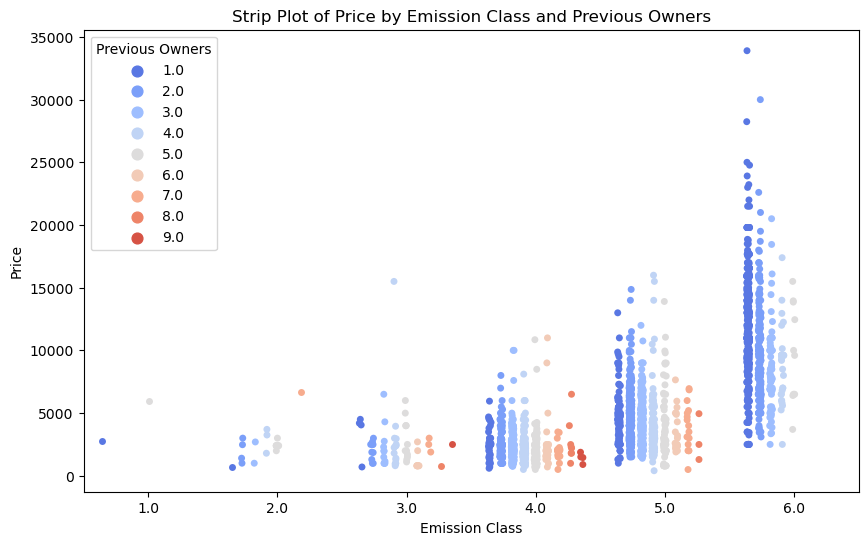

                                       Price
Emission Class Previous Owners              
1.0            1.0               2750.000000
               5.0               5995.000000
2.0            1.0                700.000000
               2.0               1968.750000
               3.0               1847.000000
               4.0               2914.666667
               5.0               2415.000000
               7.0               6700.000000
3.0            1.0               3361.000000
               2.0               2018.200000
               3.0               2200.666667
               4.0               2875.200000
               5.0               2919.750000
               6.0               1140.444444
               7.0               2461.000000
               8.0                750.000000
               9.0               2500.000000
4.0            1.0               2585.000000
               2.0               2584.411765
               3.0               2460.813793
          

In [143]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="Emission Class", y="Price", data=df, hue="Previous Owners", palette="coolwarm", dodge=True, jitter=True)
plt.xlabel("Emission Class")
plt.ylabel("Price")
plt.title("Strip Plot of Price by Emission Class and Previous Owners")
plt.legend(title="Previous Owners")
plt.show()

table = pd.pivot_table(df, values='Price', index=['Emission Class', 'Previous Owners'], aggfunc='mean')
print(table)